# Main Analysis

In [33]:
from pathlib import *
import csv
import sqlalchemy as sa
import numpy as np
import pandas as pd
import axelrod as axl
import matplotlib.pyplot as plt
%matplotlib inline

Size of Database as of writing: 

In [58]:
path_for_images = Path("../../images/folk_thm/main_analysis/")
path_for_images.mkdir(parents=True, exist_ok=True)

database_management_sys = sa.create_engine("sqlite:///../database-code/data/se/main.db")
connect_dbms_to_db = database_management_sys.connect()
se_folk_thm_data = pd.read_sql("folk_theorem_experiment", connect_dbms_to_db)
len(se_folk_thm_data), max(se_folk_thm_data["tournament_player_set"])

(825700, 159)

## p-Thresholds

Looking at the probabilities of the game ending for all the games (ignoring whether the games are degenerate or not)

In [55]:
p_thresh_data = pd.read_csv("..\database-code\data\prob_end_threshold\main.csv")
p_thresh_data.head()

,number_of_players,tournament_player_set,noise,min_p_threshold,mean_p_threshold,median_p_threshold,max_p_threshold
0,2,0,0.0,0.283263,0.283263,0.283263,0.283263
1,2,0,0.1,0.172374,0.172374,0.172374,0.172374
2,2,0,0.2,0.001000,0.051404,0.056444,0.111889
3,2,0,0.3,0.001000,0.001000,0.001000,0.001000
4,2,0,0.4,0.001000,0.001000,0.001000,0.001000


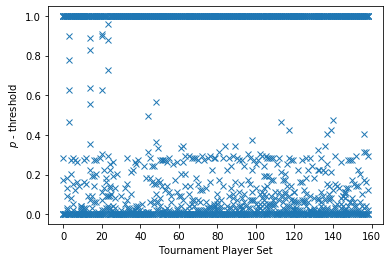

In [65]:
min_thresh_plot_path = path_for_images / "min_p_thresh.pdf"

min_thresh_plot = plt.figure()
axes = min_thresh_plot.add_subplot(1, 1, 1)
axes.set_xlabel("Tournament Player Set")
axes.set_ylabel("$p$ - threshold")
axes.plot(p_thresh_data["tournament_player_set"], p_thresh_data["min_p_threshold"], "x")
min_thresh_plot.savefig(str(min_thresh_plot_path))

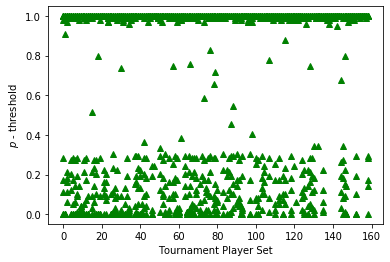

In [66]:
max_thresh_plot_path = path_for_images / "max_p_thresh.pdf"

max_thresh_plot = plt.figure()
axes = max_thresh_plot.add_subplot(1, 1, 1)
axes.set_xlabel("Tournament Player Set")
axes.set_ylabel("$p$ - threshold")
axes.plot(p_thresh_data["tournament_player_set"], p_thresh_data["max_p_threshold"], "^", color="green")
max_thresh_plot.savefig(str(max_thresh_plot_path))

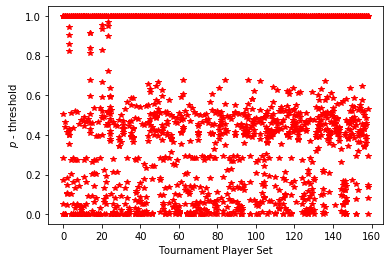

In [68]:
mean_thresh_plot_path = path_for_images / "mean_p_thresh.pdf"

mean_thresh_plot = plt.figure()
axes = mean_thresh_plot.add_subplot(1, 1, 1)
axes.set_xlabel("Tournament Player Set")
axes.set_ylabel("$p$ - threshold")
axes.plot(p_thresh_data["tournament_player_set"], p_thresh_data["mean_p_threshold"], "*", color="red")
mean_thresh_plot.savefig(str(mean_thresh_plot_path))

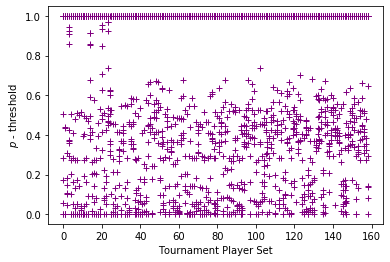

In [71]:
median_thresh_plot_path = path_for_images / "median_p_thresh.pdf"

median_thresh_plot = plt.figure()
axes = median_thresh_plot.add_subplot(1, 1, 1)
axes.set_xlabel("Tournament Player Set")
axes.set_ylabel("$p$ - threshold")
axes.plot(p_thresh_data["tournament_player_set"], p_thresh_data["median_p_threshold"], "+", color="purple")
median_thresh_plot.savefig(str(median_thresh_plot_path))

Looking at the probabilities of the game ending for all the games which are definitely non-degenerate.

In [76]:
p_thresh_data_no_degeneracy = pd.read_csv("..\database-code\data\prob_end_threshold\main-no-degeneracy.csv")
p_thresh_data_no_degeneracy.head()

,number_of_players,tournament_player_set,noise,min_p_threshold,mean_p_threshold,median_p_threshold,max_p_threshold
0,2,0,0.0,0.283263,0.283263,0.283263,0.283263
1,2,0,0.1,0.172374,0.172374,0.172374,0.172374
2,2,0,0.2,0.001000,0.051404,0.056444,0.111889
3,2,0,0.3,0.001000,0.001000,0.001000,0.001000
4,2,0,0.4,0.001000,0.001000,0.001000,0.001000


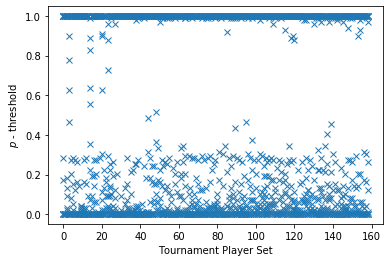

In [74]:
non_degenerate_min_thresh_plot_path = path_for_images / "non_degenerate_min_p_thresh.pdf"

non_degenerate_min_thresh_plot = plt.figure()
axes = non_degenerate_min_thresh_plot.add_subplot(1, 1, 1)
axes.set_xlabel("Tournament Player Set")
axes.set_ylabel("$p$ - threshold")
axes.plot(p_thresh_data_no_degeneracy["tournament_player_set"], p_thresh_data_no_degeneracy["min_p_threshold"], "x")
non_degenerate_min_thresh_plot.savefig(str(non_degenerate_min_thresh_plot_path))

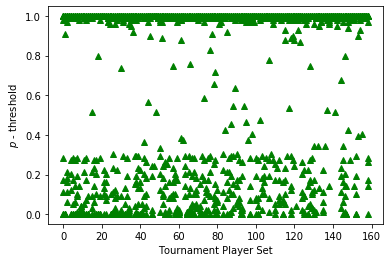

In [78]:
non_degenerate_max_thresh_plot_path = path_for_images / "non_degenerate_max_p_thresh.pdf"

non_degenerate_max_thresh_plot = plt.figure()
axes = non_degenerate_max_thresh_plot.add_subplot(1, 1, 1)
axes.set_xlabel("Tournament Player Set")
axes.set_ylabel("$p$ - threshold")
axes.plot(p_thresh_data_no_degeneracy["tournament_player_set"], p_thresh_data_no_degeneracy["max_p_threshold"], "^", color="green")
non_degenerate_max_thresh_plot.savefig(str(non_degenerate_max_thresh_plot_path))

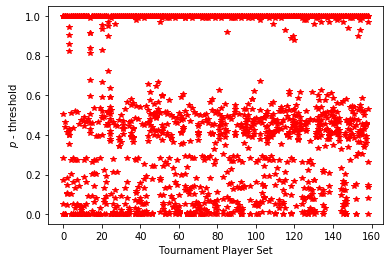

In [79]:
non_degenerate_mean_thresh_plot_path = path_for_images / "non_degenerate_mean_p_thresh.pdf"

non_degenerate_mean_thresh_plot = plt.figure()
axes = non_degenerate_mean_thresh_plot.add_subplot(1, 1, 1)
axes.set_xlabel("Tournament Player Set")
axes.set_ylabel("$p$ - threshold")
axes.plot(p_thresh_data_no_degeneracy["tournament_player_set"], p_thresh_data_no_degeneracy["mean_p_threshold"], "*", color="red")
non_degenerate_mean_thresh_plot.savefig(str(non_degenerate_mean_thresh_plot_path))

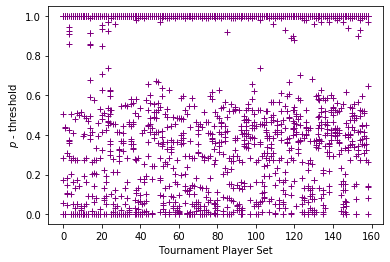

In [81]:
non_degenerate_median_thresh_plot_path = path_for_images / "non_degenerate_median_p_thresh.pdf"

non_degenerate_median_thresh_plot = plt.figure()
axes = non_degenerate_median_thresh_plot.add_subplot(1, 1, 1)
axes.set_xlabel("Tournament Player Set")
axes.set_ylabel("$p$ - threshold")
axes.plot(p_thresh_data_no_degeneracy["tournament_player_set"], p_thresh_data_no_degeneracy["median_p_threshold"], "+", color="purple")
non_degenerate_median_thresh_plot.savefig(str(non_degenerate_median_thresh_plot_path))

Here we will consider the mean(?) p-values only, with non_degenerate games.

### Effects of different number of players

In [122]:
separated_player_dict = {}
for player_number in p_thresh_data_no_degeneracy["number_of_players"]:
    separated_player_dict[str(player_number)] = p_thresh_data_no_degeneracy[p_thresh_data_no_degeneracy["number_of_players"] == player_number]
separated_player_dict.keys()   

dict_keys(['2', '3', '4', '5', '6', '7', '8'])

finished!


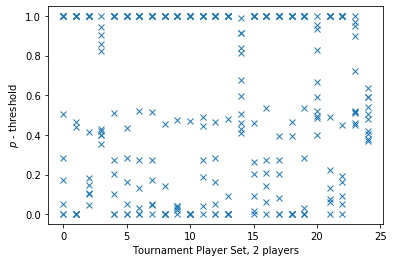

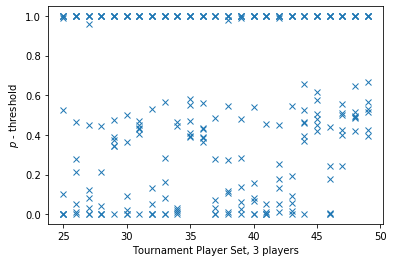

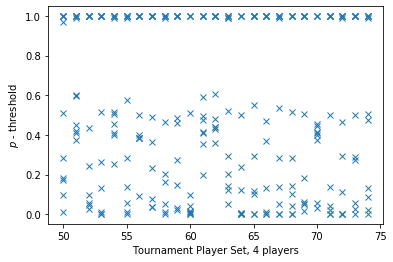

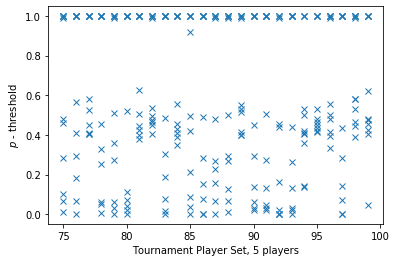

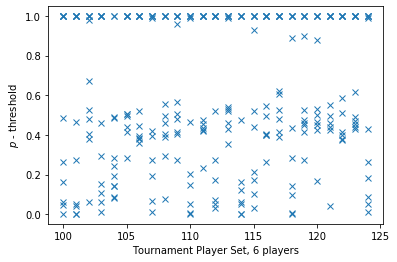

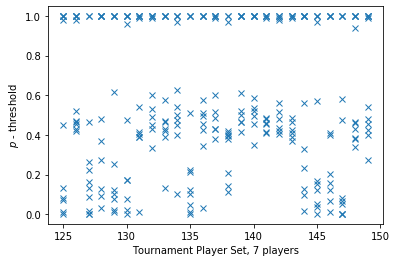

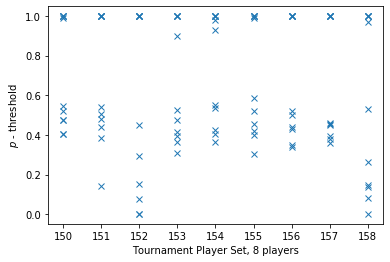

In [123]:
for player_number in separated_player_dict.keys():
    file_name = str(player_number) + "player_mean_p_thresh.pdf"
    player_mean_thresh_plot_path = path_for_images / file_name
    player_mean_thresh_plot = plt.figure()
    axes = player_mean_thresh_plot.add_subplot(1, 1, 1)
    axes.set_xlabel("Tournament Player Set" + ", " + str(player_number) + " " + "players")
    axes.set_ylabel("$p$ - threshold")
    axes.plot(separated_player_dict[str(player_number)]["tournament_player_set"], separated_player_dict[str(player_number)]["mean_p_threshold"], "x")
    player_mean_thresh_plot.savefig(str(player_mean_thresh_plot_path))
print("finished!")

In [124]:
player_thresh_data = [separated_player_dict[str(player_number)]["mean_p_threshold"] for player_number in range(2, 9)]
for element in range(7):
    player_thresh_data[element].index = range(len(player_thresh_data[element]))

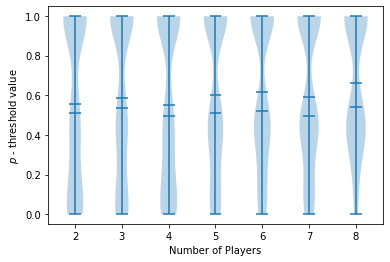

In [131]:
player_mean_thresh_violin_path = path_for_images / "player_mean_thresh_violinplot.pdf"
player_mean_thresh_violinplot = plt.figure()
axes = player_mean_thresh_violinplot.add_subplot(1, 1, 1)
axes.set_xlabel("Number of Players")
axes.set_xticks(np.arange(1, len(range(7))+1))
axes.set_xticklabels(list(range(2, 9)))
axes.set_ylabel("$p$ - threshold value")
axes.violinplot(player_thresh_data, showmeans=True, showmedians=True)
player_mean_thresh_violinplot.savefig(str(player_mean_thresh_violin_path))

### Effects of Noise

In [126]:
separated_noise_dict = {}
for amount_of_noise in p_thresh_data_no_degeneracy["noise"]:
    separated_noise_dict[str(amount_of_noise)] = p_thresh_data_no_degeneracy[p_thresh_data_no_degeneracy["noise"] == amount_of_noise]
separated_noise_dict.keys()

dict_keys(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'])

finished!


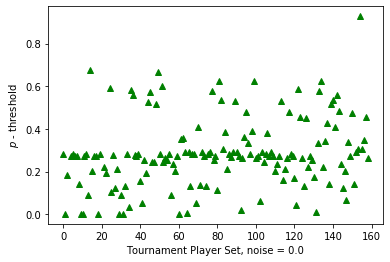

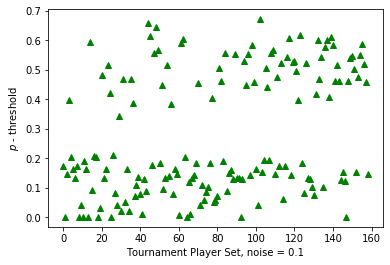

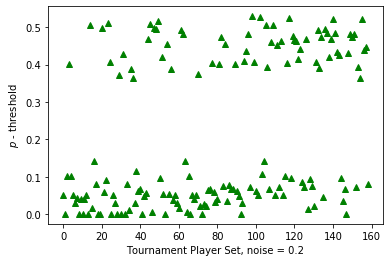

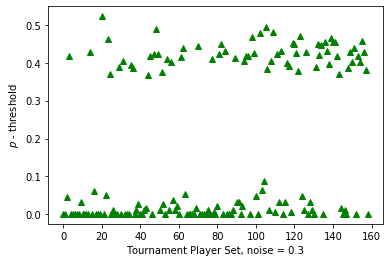

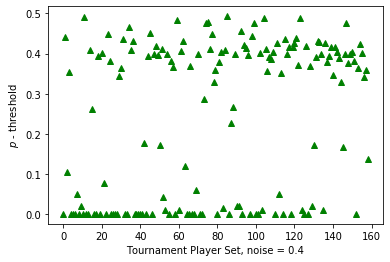

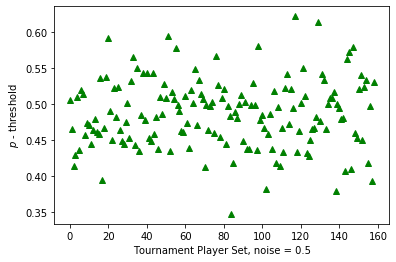

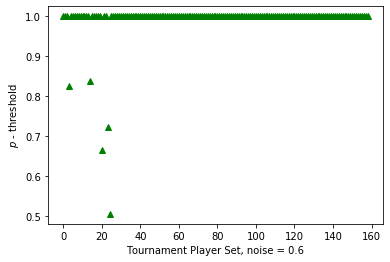

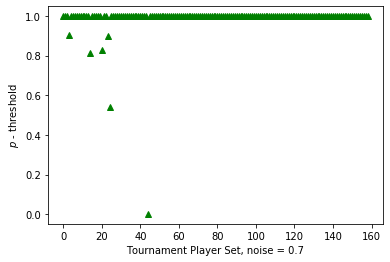

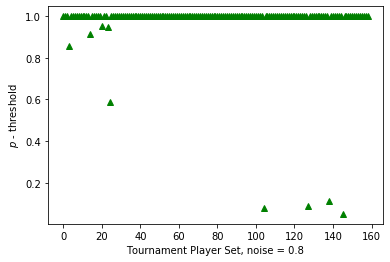

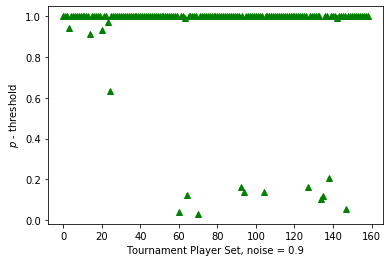

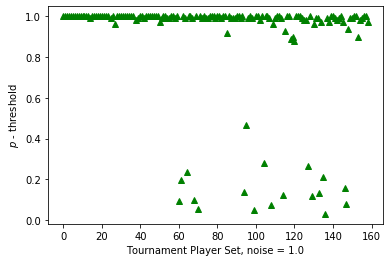

In [127]:
for amount_of_noise in separated_noise_dict.keys():
    file_name = str(amount_of_noise) + "noise_mean_p_thresh.pdf"
    noise_mean_thresh_plot_path = path_for_images / file_name
    noise_mean_thresh_plot = plt.figure()
    axes = noise_mean_thresh_plot.add_subplot(1, 1, 1)
    axes.set_xlabel("Tournament Player Set" + ", noise = " + str(amount_of_noise))
    axes.set_ylabel("$p$ - threshold")
    axes.plot(separated_noise_dict[str(amount_of_noise)]["tournament_player_set"], separated_noise_dict[str(amount_of_noise)]["mean_p_threshold"], "^", color = "green")
    noise_mean_thresh_plot.savefig(str(noise_mean_thresh_plot_path))
print("finished!")

In [128]:
noise_thresh_data = [separated_noise_dict[str(amount_of_noise)]["mean_p_threshold"] for amount_of_noise in separated_noise_dict.keys()]
for element in range(11):
    noise_thresh_data[element].index = range(len(noise_thresh_data[element]))

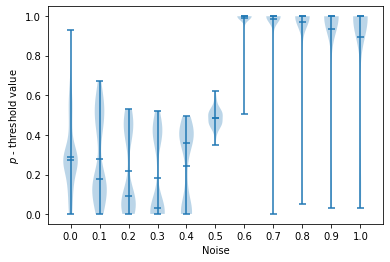

In [130]:
noise_mean_thresh_violin_path = path_for_images / "noise_mean_thresh_violinplot.pdf"
noise_mean_thresh_violinplot = plt.figure()
axes = noise_mean_thresh_violinplot.add_subplot(1, 1, 1)
axes.set_xlabel("Noise")
axes.set_xticks(np.arange(1, len(range(11))+1))
axes.set_xticklabels(separated_noise_dict.keys())
axes.set_ylabel("$p$ - threshold value")
axes.violinplot(noise_thresh_data, showmeans=True, showmedians=True)
noise_mean_thresh_violinplot.savefig(str(noise_mean_thresh_violin_path))